<a href="https://colab.research.google.com/github/LandonSean/COGS108_Repo/blob/main/Final_group045_wi25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Landon Sean
- Jocelyn Ng
- Kevin Briceno
- Alexa Der
- Leyna Pham

# Research Question

How do various features influence the sale price of houses in San Francisco, California?
Our research question consists of three parts listed below:

Feature I - Square Footage

Feature II - Number of bedrooms

Feature III - Year built



## Background and Prior Work


This project aims to explore how various factors affect the sale price of houses in San Francisco. Alexander Fromm Lurie, a San Francisco real estate advisor with Compass, “[San Francisco] The Bay Area has among the strongest economies in the world, which attracts talent and infuses an abundance of money in the region.” Real estate markets can be highly variable, with certain features of a property such as its size, location, and age, that often have a significant influence on its value. By analyzing a dataset of housing prices in San Francisco, this project aims to understand the relationship between sale price and key features like square footage, number of bedrooms, neighborhood, and year built. The main objective is to identify which of these independent variables most strongly predict the sale price of homes, which can offer relevant information for homebuyers, sellers, and real estate investors.

This topic has been explored and numerous cases have been done figuring out the why. The article by The Own Team explores the biggest factors influencing home prices today. The author, Wilson Leung, explains that a strong job market and economic growth tend to push prices up, while high interest rates can slow down demand. Location remains key, with desirable neighborhoods, school districts, and amenities significantly affecting property values <a name="#cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). He highlights the impact of location, home condition, and government policies on valuations. With mortgage rates fluctuating, he advises buyers and sellers to stay informed and monitor trends.

Kara Maria Kockelman’s research on 'The Effects of Location Elements on Home Purchase Prices and Rents: Evidence from the San Francisco Bay Area' highlights the effects of locational factors on home prices and rent in the San Francisco Bay Area. Her study reveals that properties with better access to job centers, highways, and public transit tend to have higher values, and homes with shorter commute times are also priced higher. Neighborhood features, such as income levels, amenity accessibility, and crime rates also affect housing costs <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). This seemed to be similar to a subsection that our team would like to answer. Environmental factors, including pollution levels and scenic views, also play a significant role in determining property values. By employing regression models, the study quantifies these impacts, which ultimately resulted in the finding that location-based factors—such as accessibility, neighborhood quality, and environmental conditions—collectively account for significant variations in home prices and rents. Similarly to our team’s research question, this study underscores the importance of these features in the value of real estate.

1. <a name="#cite_note-1"></a> [^](#cite_ref-1) Leung, W. (2024). The Top Factors Affecting House Prices and How to Navigate Them. The Own Team.
(https://www.theownteam.com/blog/the-top-factors-affecting-house-prices-and-how-to-navigate-them/)
2. <a name="cite_note-1"></a> [^](#cite_ref-2) Kockelman, K. (2024). The Effects of Location Elements on Home Purchase Prices and Rents: Evidence from the San Francisco Bay Area. University of California, Berkeley, 1997
(chrome-extension://bdfcnmeidppjeaggnmidamkiddifkdib/viewer.html?file=https://www.caee.utexas.edu/prof/kockelman/public_html/homepric.pdf)

# Hypothesis



To assess the influence of home buyer features on sale price, we ranked them as follows: 1) square footage is likely the most significant factor, given the limited space in San Francisco; 2) the number of bedrooms follows closely, as space constraints also make this a key consideration; and 3) the year built, which is less impactful compared to the other two features, as renovations can diminish the relevance of a home's original construction date. While these features appear strongly correlated with higher sale prices, it’s important to consider potential nonlinear relationships, as individual buyer preferences may affect how these factors influence pricing.



# Data

## Data overview

Dataset #1

Dataset Name: Zillow House Price Data

Link to the dataset: https://www.kaggle.com/datasets/paultimothymooney/zillow-house-price-data?resource=download

Number of observations: 100 (specifically related to San Francisco)

Number of variables: 6

For the Zillow House Price Data dataset, we will focus on housing price-related variables specific to San Francisco. This dataset contains multiple tables pertaining to the median prices of homes specifically the number of bedrooms which will be important for our study. As for the timeframe for our datasets this one specifically is between 2008 to 2020, the other datasets we're using may be different but we'll focus on the timeframe that overlays the most.
Key variables include:
- RegionName (City name, filtered for San Francisco)
- State (Filtered for CA)
- Bedroom (# of bedrooms)
- Date Columns (Monthly home price values over time)

This dataset consists of time-series data where housing prices are recorded for each month
For data wrangling, we need to:
- Filter for San Francisco (RegionName == San Francisco and State == CA)
- Drop irrelevant columns (like Unnamed: 0, RegionID, etc.)
- Handle missing values, especially in time-series columns

Dataset #2
  - Dataset Name: Housing Inventory: Median Listing Price per Square Feet in San Francisco County/city, CA
  - Link to the dataset: https://fred.stlouisfed.org/data/MEDLISPRIPERSQUFEE6075
  - Number of observations: 102
  - Number of variables: 2

For this dataset, we will be utilizing the two variables, which are date (ranges monthly from July 2016 to December 2024) and value (in US dollars of the median listing price per square foot in a given market during a specific month).
Thus, this dataset also contains time-series data where the median listing price per square footage is documented monthly.
For data wrangling, cleaning, and preprocessing, we need to:
- Check for missing values, incorrect data types, and duplicates
- Make sure that the Date column is formatted as a datetime object and the Value column is numeric
- Filter any outliers within a specific percentile range.
- Extract time-based features such as year, month, and quarter from the Date column to improve data analysis

We plan to combine these datasets by analyzing housing prices in San Francisco to understand how they can be influenced by the number of bedrooms and the median price per square footage of the house. For example, more bedrooms may imply more square footage in a house, thus concluding that the median housing price would be more expensive.

##Set Up

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import scipy.stats as stats

## Dataset Zillow House Price Data

To preface there are five datasets that are under this name, but we'll be putting in all under this section because they are all from Zillow. Each dataset is typical values of 1-5 bedroom homes. We were unable to upload the dataset directly t github as github as a file size limit, but we are able to still show the data wrangling process.

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1xuIokylmapYPrxICRXji8t2tWOjO57K_'

# Load the data
df = pd.read_csv(url)

# Print the first few rows
print(df.head())

# Check for San Francisco data
sf_data = df[df["RegionName"] == "San Francisco"]
sf_data.head()

   Unnamed: 0  RegionID   RegionName State                             Metro  \
0           0      6181     New York    NY       New York-Newark-Jersey City   
1           1     12447  Los Angeles    CA    Los Angeles-Long Beach-Anaheim   
2           2     39051      Houston    TX  Houston-The Woodlands-Sugar Land   
3           3     17426      Chicago    IL          Chicago-Naperville-Elgin   
4           4      6915  San Antonio    TX         San Antonio-New Braunfels   

           CountyName  SizeRank   2008-01   2008-02        2008-03  ...  \
0       Queens County         1  421862.0  422369.5  421916.666667  ...   
1  Los Angeles County         2       NaN       NaN            NaN  ...   
2       Harris County         3   75638.0   75406.5   75325.000000  ...   
3         Cook County         4       NaN       NaN            NaN  ...   
4        Bexar County         5   67385.0   67579.5   67703.000000  ...   

         2019-02        2019-03        2019-04        2019-05       

,Unnamed: 0,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
13,13,20330,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,NaN,874404.0,879904.0,...,935285.0,937182.0,937867.333333,942093.0,946317.0,941015.0,933210.333333,926174.0,921821.666667,917028.666667


Here we print the few couple of rows to see if our dataset can be loaded, we took one of them for example for this process. Then we checked for if San Francsico can be properly found through column 'RegionName' and we were able to filter that, which lets us go into actually filtering through and organzing our datasets.

In [2]:
def load_san_francisco_data(file_path):
    df = pd.read_csv(file_path)

    # Print the loaded data
    print("Loaded data:")
    print(df.head())

    # Filter for San Francisco
    df = df[df["RegionName"] == "San Francisco"]

    # Print the filtered data
    print("Filtered data for San Francisco:")
    print(df.head())

    # Select relevant columns
    date_columns = [col for col in df.columns if col.startswith('20')]
    columns_to_keep = ["RegionName", "State"] + date_columns
    df = df[columns_to_keep]

    # Melting & type conversion
    df_melted = df.melt(id_vars=["RegionName", "State"], value_vars=date_columns, var_name="Date", value_name="Price")
    df_melted["Date"] = pd.to_datetime(df_melted["Date"], errors='coerce')
    df_melted["Price"] = df_melted["Price"].replace({',': '', '$': ''}, regex=True)
    df_melted["Price"] = pd.to_numeric(df_melted["Price"], errors='coerce')
    df_melted = df_melted.dropna(subset=["Price", "Date"])

    # Drop rows with null values in 'Price' and 'Date'
    df_melted = df_melted.dropna(subset=["Price", "Date"])

    # Print the melted data
    print("Melted data:")
    print(df_melted.head())

    return df_melted

def plot_san_francisco_data(dataframe, title='Data Plot', x_label='X-axis', y_label='Y-axis'):
    """
    Plots the Zillow house price data for San Francisco using Matplotlib.
    """
    if not dataframe.empty:
        plt.figure(figsize=(10, 6))
        plt.plot(dataframe['Date'], dataframe['Price'], marker='o', linestyle='-', color='b')
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(True)
        plt.show()
    else:
        print("No data available to plot for San Francisco.")

To Avoid repitition in coding we made two functions that will be used a lot, one for loading the data and the other for plotting. To preface as well these will only be used for the datasets coming from Zillow.

##Load Zillow CSV

In [3]:
# URL for the dataset
zillow_1 = 'https://drive.google.com/uc?export=download&id=1xuIokylmapYPrxICRXji8t2tWOjO57K_'
zillow_2 = 'https://drive.google.com/uc?export=download&id=1PadULdsquxKUYaOrbhJJUz6yMw45pwdr'
zillow_3 = 'https://drive.google.com/uc?export=download&id=1-nJufxPpX7LJrPgZp7uRqhvCBqMuVZDP'
zillow_4 = 'https://drive.google.com/uc?export=download&id=1_IlRLG7wboJSNCnXYxADvLmulgnM51Aw'
zillow_5 = 'https://drive.google.com/uc?export=download&id=1jrMBtGAZviCibpn0pg51aD34xZW9mQyV'

# Load the data for San Francisco
bed1 = load_san_francisco_data(zillow_1)
bed2 = load_san_francisco_data(zillow_2)
bed3 = load_san_francisco_data(zillow_3)
bed4 = load_san_francisco_data(zillow_4)
bed5 = load_san_francisco_data(zillow_5)

Loaded data:
   Unnamed: 0  RegionID   RegionName State                             Metro  \
0           0      6181     New York    NY       New York-Newark-Jersey City   
1           1     12447  Los Angeles    CA    Los Angeles-Long Beach-Anaheim   
2           2     39051      Houston    TX  Houston-The Woodlands-Sugar Land   
3           3     17426      Chicago    IL          Chicago-Naperville-Elgin   
4           4      6915  San Antonio    TX         San Antonio-New Braunfels   

           CountyName  SizeRank   2008-01   2008-02        2008-03  ...  \
0       Queens County         1  421862.0  422369.5  421916.666667  ...   
1  Los Angeles County         2       NaN       NaN            NaN  ...   
2       Harris County         3   75638.0   75406.5   75325.000000  ...   
3         Cook County         4       NaN       NaN            NaN  ...   
4        Bexar County         5   67385.0   67579.5   67703.000000  ...   

         2019-02        2019-03        2019-04        2

Before loading we converted google drive links to direct download links. It does seem everything properly loaded.

## Median House Prices

In [5]:
import pandas as pd

url =  "https://drive.google.com/uc?export=download&id=1DxU01sUXZUPPV1A_UsKdsyqskYA5LP-B"

df = pd.read_csv(url)

print(df.head())  # Display the first few rows


  observation_date  median_house_pricing
0       2016-07-01                   950
1       2016-08-01                   924
2       2016-09-01                   940
3       2016-10-01                   930
4       2016-11-01                   950


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Results

## Exploratory Data Analysis

### Median Home Prices versus number of bedrooms

Does the number of bedrooms affect the price of the home in SF?

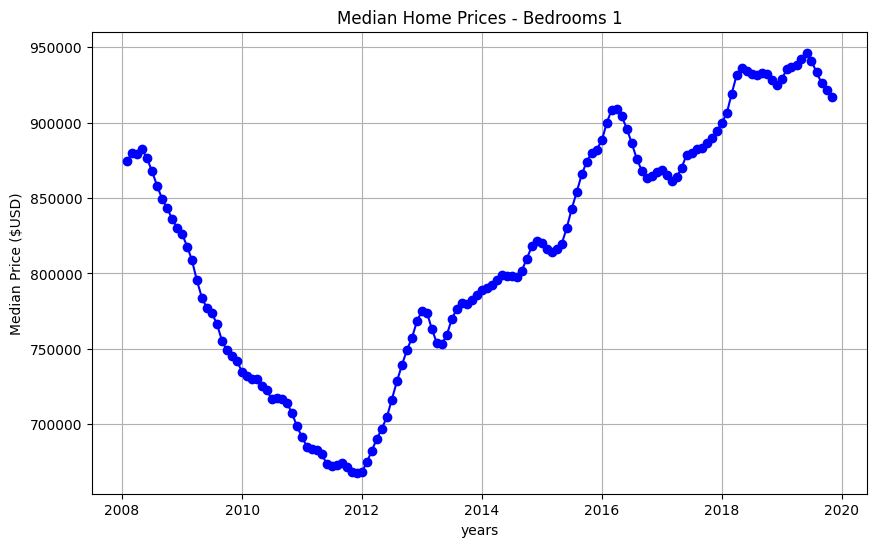

In [ ]:
# Plot the data for bedrooms 1 from zillow
plot_san_francisco_data(bed1, 'Median Home Prices - Bedrooms 1', 'years', 'Median Price ($USD)')

We can see that the data for median home prices for one bedrooms in San Francisco are in the time range of around 2008 through 2020. The median home prices in 2008 seem to start around 870,000 USD, but then slowly decline thousands of dollars at a global minimum of around 640,000 USD in 2012. It should be noted that there seem to be less data points plotted compared to the other bedroom graphs. This could be due to the fact that San Francisco does not typically sell one bedroom homes because of its dense population and scarce land availabilities.

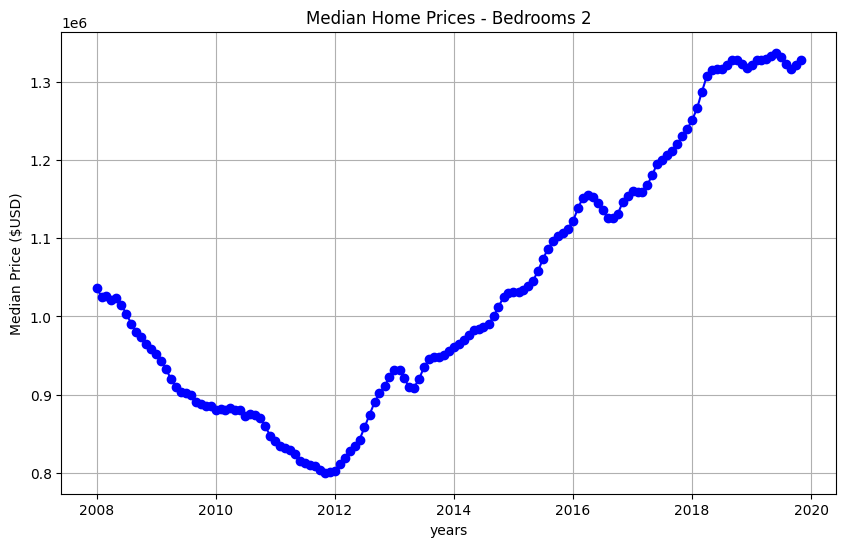

In [ ]:
plot_san_francisco_data(bed2, 'Median Home Prices - Bedrooms 2', 'years', 'Median Price ($USD)')

*To preface for the y-axis the scale is on 1e6 because it has reach over a million.
We can see that the data for median home prices for two bedrooms in San Francisco are in the time range of around 2008 through 2020. There appears to be a significant amount more of data points for two bedroom houses in SF compared to one bedroom houses, which would explain why the data seems less volatile. Nevertheless, there still seems to be some volatility and compactness of the 2 bedroom graphs. This makes sense because SF homes typically have more apartments that are only 2 bedrooms as a pose to an entire house with only 2 bedrooms.

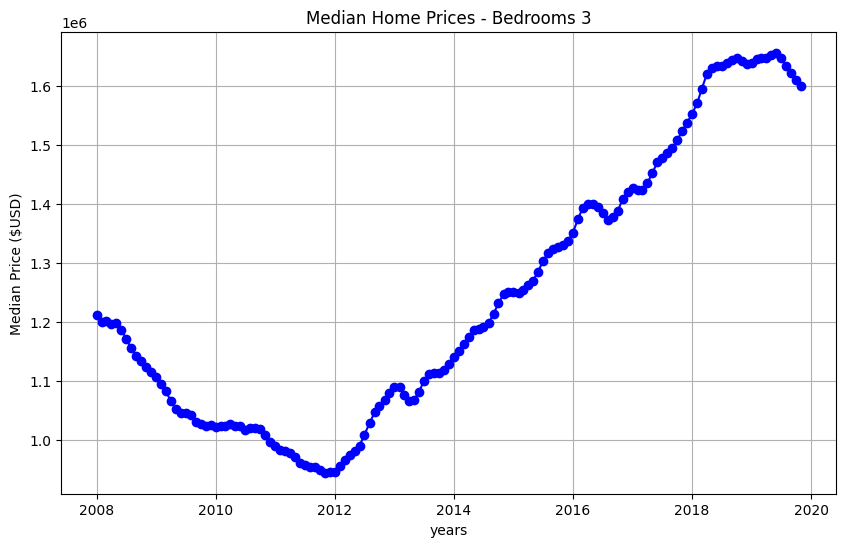

In [ ]:
plot_san_francisco_data(bed3, 'Median Home Prices - Bedrooms 3', 'years', 'Median Price ($USD)')

We can see that the data for median home prices for three bedrooms in San Francisco are in the time range of around 2008 through 2020. Now, the graph is starting to stretch out more horizontally and show less volatility amongst the years. Additionally, there are significantly more patches of continuous dense dark blue. This alludes to the fact that there are more houses in San Francisco that are at least 3 bedrooms.


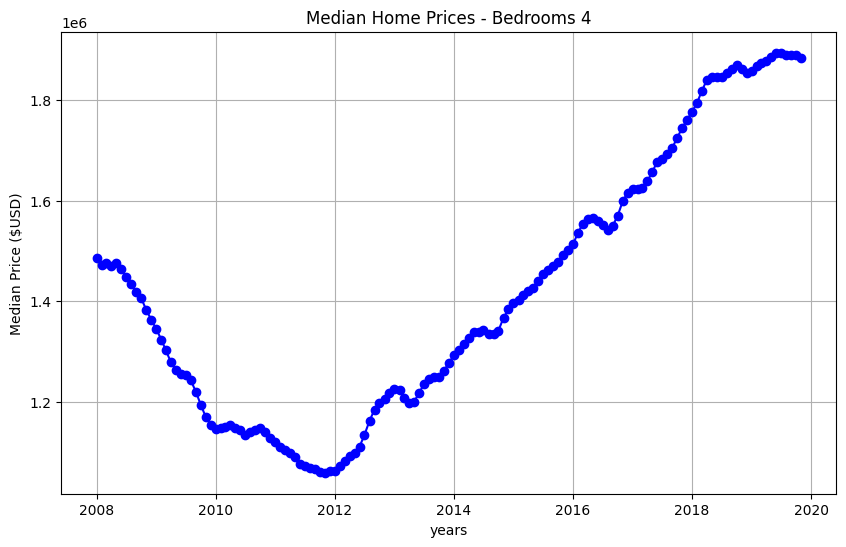

In [ ]:
plot_san_francisco_data(bed4, 'Median Home Prices - Bedrooms 4', 'years', 'Median Price ($USD)')

We can see that the data for median home prices for four bedrooms in San Francisco are in the time range of around 2008 through 2020. In comparison to the previous graph with 3 bedrooms, the 4 bedroom graph seems to slightly stabilize, but the general shape and dips are still very similar to the previous graph. We can still see that there is a jump in the median price amongst the years by a few thousand in relation to 3 bedroom graph, which makes sense because the more bedrooms, the extra charge you can charge.

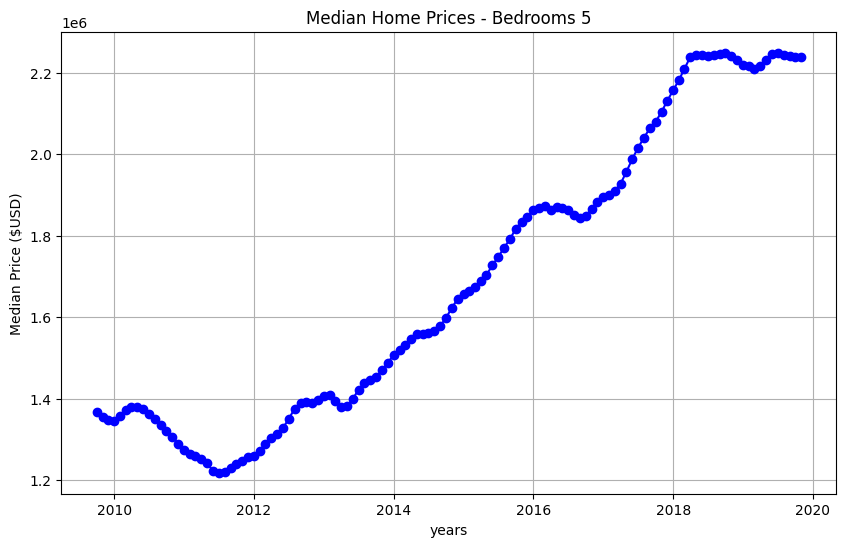

In [ ]:
plot_san_francisco_data(bed5, 'Median Home Prices - Bedrooms 5', 'years', 'Median Price ($USD)')

*note: data for 5 bedroom didn't show until 2009 (but doesn't alter the analysis that much)
We can see that the data for median home prices for five bedrooms in San Francisco are in the time range of around 2008 through 2020. Five bedroom homes seem to have the most continuous dense dark blue throughout the graph, which can be due to there being more 5 bedroom homes in San Francisco compared to 4 or less bedrooms. We can see that there is a noticeable stability in the 5 bedroom graph since there is a minimal decrease from 2009 to the global minimum approaching 2012. This can be interpreted that the median price of 5 bedroom homes in SF followed a similar trend to the other graphs, but since there seems to be more data, there's less volatility in the difference in price over the years.

Overall, the graphs displaying the median home prices in San Francisco between 2008 and 2020 all collectively have global minimums in median price around 2012. The decline of SF housing prices from 2008 until the global minimum around 2012 may be due to the residual effects of the housing bubble burst in 2008 and displaying the slow recovery of the housing market after 2012. The general shape of all of the graphs seem to display a slight decrease from 2008 to 2012 and then an exponential increase (with minor dips) of thousands of dollars until 2020. Additionally, there is a noticeable difference between the numebr of bedroom graphs' steepnesses. If we compared the graph of median home prices of one bedroom to each of the other numbers of bedrooms, it can be observed that the price of a house with more bedrooms has a less volatile median home price throughout the years. Alternatively, the one bedroom graph of median home prices is the most volatile. This can be interpreted as a possible correlation between the number of bedrooms and median home prices being that the change in price for the homes would increase more steadily as you increase the number of bedrooms. Furthermore, you can also notice that there seems to be less data points for for the graph of the median home prices of one bedroom homes in SF, which could be related to why that graph seems more volatile since there are less data points compared to the graphs with 2+ bedrooms. It should be noted that the parts of the graphs that are darker and denser can be attributed to the fact that there is more data for median home prices on those stretches of time as well as being tied to the specific amount of bedrooms. For example, there tends to be denser dark blue parts of the graph when the data dips starting on the graphs with 2 or more bedrooms.

Additionally, there is a noticeable increase in price between the general median prices of homes when you add a bedroom. This can be seen when the intial price we see in 2008 increase by thousands of dollars as you compare each graph and increase them by one room.

Finally, since the trend among all of the median home prices of 1 through 5 bedrooms have a similar shape, we hypothesize that the number of bedrooms in a San Francisco home, doesn't significantly alter the price of the home.


### Median House Pricing EDA

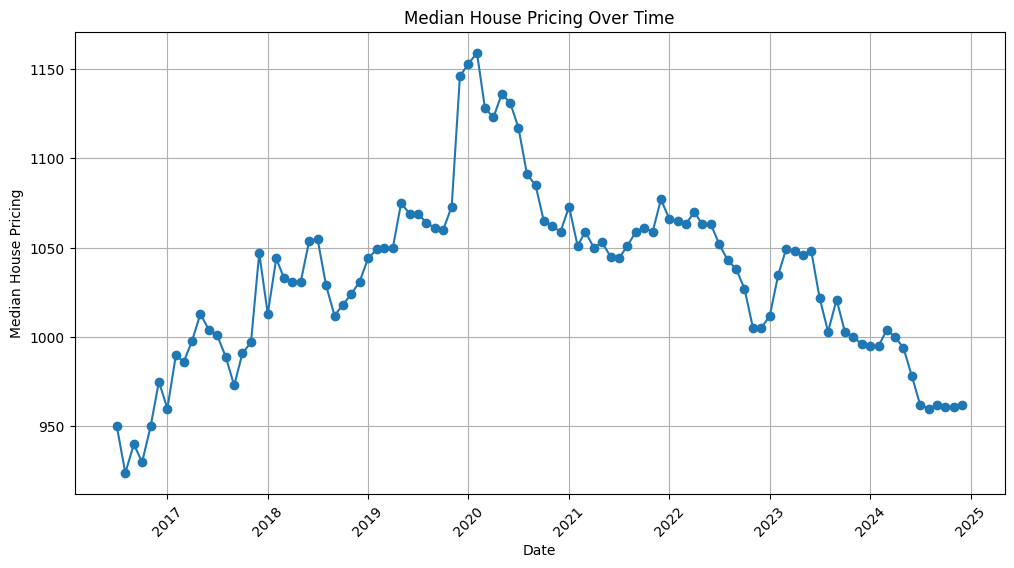

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1DxU01sUXZUPPV1A_UsKdsyqskYA5LP-B'
df = pd.read_csv(url, parse_dates=['observation_date'])

plt.figure(figsize=(12, 6))
plt.plot(df['observation_date'], df['median_house_pricing'], marker='o', linestyle='-') #plotting the data to determine if there are any time-based trends in housing prices

plt.title('Median House Pricing Over Time')
plt.xlabel('Date')
plt.ylabel('Median House Pricing')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

Trend Analysis
* There is a steady increase in house prices from 2016 to late 2019. Around early 2020, there is a sharp spike, possibly due to market fluctuations (such as the COVID-19 pandemic influencing real estate). After 2021, the median house pricing shows a declining trend, which could be due to market corrections, rising interest rates, or economic slowdowns.

Distribution of Values
* The dataset appears to have seasonal fluctuations, with noticeable peaks and dips. Prices are not stable; there are periods of rapid growth followed by corrections.

Outliers & Anomalies
* The spike in early 2020 seems like a major outlier or an anomaly in the trend.

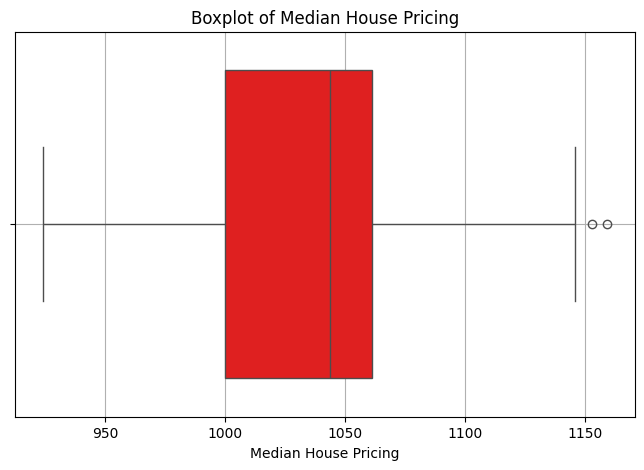

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1DxU01sUXZUPPV1A_UsKdsyqskYA5LP-B'
df = pd.read_csv(url, parse_dates=['observation_date'])

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['median_house_pricing'], color='red') #creating the boxplot to identify any outliers
plt.title('Boxplot of Median House Pricing') #labeling the boxplot
plt.xlabel('Median House Pricing')
plt.grid(True)
plt.show()

The boxplot indicates that the median house pricing has a broad range, with a few outliers on the higher end. The interquartile range (IQR) spans approximately from 1000 to 1100, suggesting moderate variation in house prices. The presence of outliers beyond 1150 suggests occasional spikes in pricing.

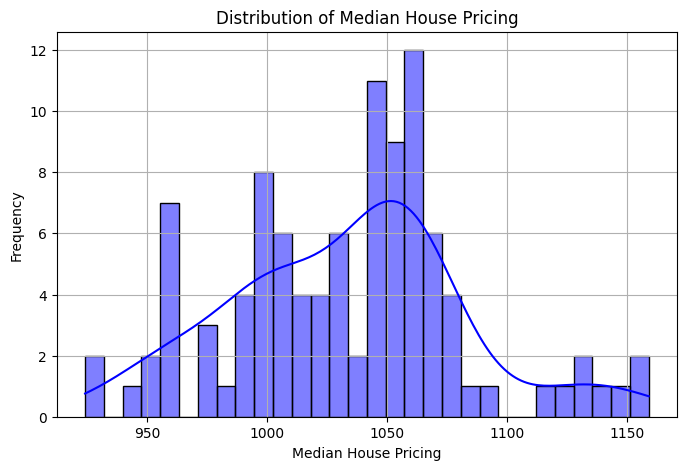

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['median_house_pricing'], bins=30, kde=True, color='blue') #creating a histogram to understand the distribution of median housing prices
plt.title('Distribution of Median House Pricing')
plt.xlabel('Median House Pricing')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The distribution of house pricing appears slightly right-skewed, meaning there were some higher-priced homes that increased the average. The density plot overlaid on the histogram shows a multimodal shape, suggesting fluctuations in house pricing over time, possibly reflecting economic or market-driven cycles.

Together, these visualizations suggest that house prices were relatively stable, with some periods of increase followed by declines, particularly after the year 2020.

##Correlation between 1 bedroom homes and Square footage

To preface for this section we had chosen to look at the correlation number of bedrooms with pricing per square footage for homes. We left out bed2 dataset as even up until 4 bedrooms the correlation is fairly steady and consistent. Originally we only inculded bedrooms 1,3, and 5 as our basis, but with the big drop in 5 we decided to include bed4 dataset.

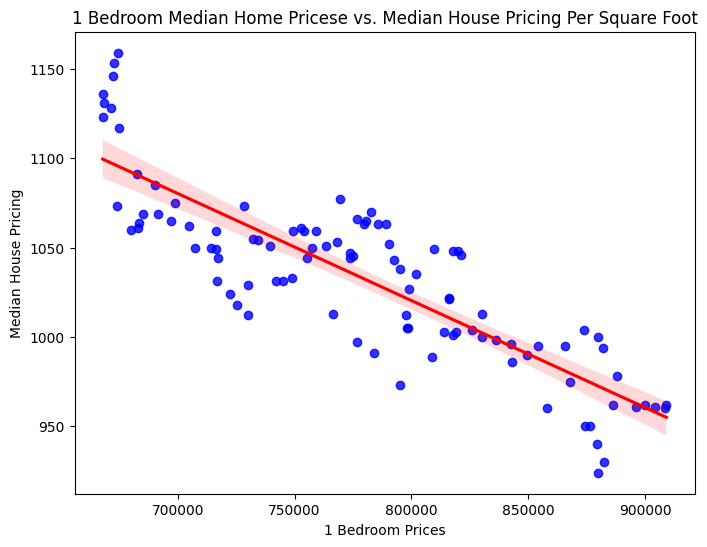

In [43]:
# Ensure both DataFrames are aligned
min_rows = min(len(bed1), len(df))
bed1_trimmed = bed1.iloc[:min_rows]
df_trimmed = df.iloc[:min_rows]

# Calculate Pearson correlation coefficient and p-value
r_value, p_value = stats.pearsonr(bed1_trimmed["Price"], df_trimmed["median_house_pricing"])

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=bed1_trimmed["Price"], y=df_trimmed["median_house_pricing"],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Labels and title
plt.xlabel("1 Bedroom Prices")
plt.ylabel("Median House Pricing")
plt.title("1 Bedroom Median Home Pricese vs. Median House Pricing Per Square Foot")

# Show plot
plt.show()

In [44]:
# Print full precision p-value
print(f"Pearson Correlation (r): {r_value:.4f}")
print(f"P-value: {p_value:.30f}")  # Shows more decimal places

Pearson Correlation (r): -0.8512
P-value: 0.000000000000000000000000000009


##Correlation between 3 bedroom homes and Square footage

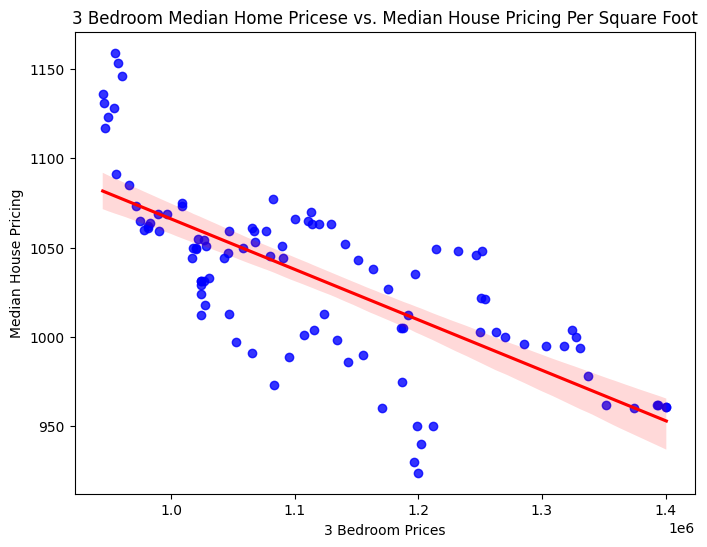

In [45]:
# Ensure both DataFrames are aligned
min_rows = min(len(bed3), len(df))
bed3_trimmed = bed3.iloc[:min_rows]
df_trimmed = df.iloc[:min_rows]

# Calculate Pearson correlation coefficient and p-value
r_value, p_value = stats.pearsonr(bed3_trimmed["Price"], df_trimmed["median_house_pricing"])

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=bed3_trimmed["Price"], y=df_trimmed["median_house_pricing"],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Labels and title
plt.xlabel("3 Bedroom Prices")
plt.ylabel("Median House Pricing")
plt.title("3 Bedroom Median Home Pricese vs. Median House Pricing Per Square Foot")

# Show plot
plt.show()

In [46]:
# Print full precision p-value
print(f"Pearson Correlation (r): {r_value:.4f}")
print(f"P-value: {p_value:.30f}")  # Shows more decimal places

Pearson Correlation (r): -0.7248
P-value: 0.000000000000000007137876201792


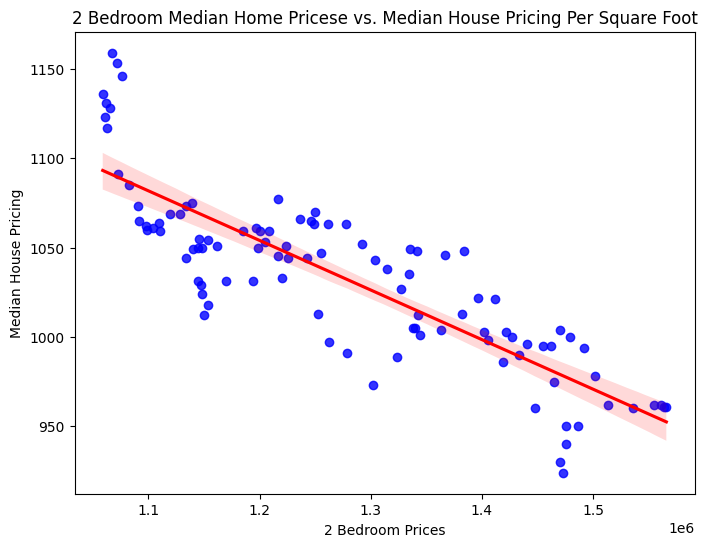

In [47]:
# Ensure both DataFrames are aligned
min_rows = min(len(bed4), len(df))
bed4_trimmed = bed4.iloc[:min_rows]
df_trimmed = df.iloc[:min_rows]

# Calculate Pearson correlation coefficient and p-value
r_value, p_value = stats.pearsonr(bed4_trimmed["Price"], df_trimmed["median_house_pricing"])

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=bed4_trimmed["Price"], y=df_trimmed["median_house_pricing"],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Labels and title
plt.xlabel("2 Bedroom Prices")
plt.ylabel("Median House Pricing")
plt.title("2 Bedroom Median Home Pricese vs. Median House Pricing Per Square Foot")

# Show plot
plt.show()

In [48]:
# Print full precision p-value
print(f"Pearson Correlation (r): {r_value:.4f}")
print(f"P-value: {p_value:.30f}")  # Shows more decimal places

Pearson Correlation (r): -0.8448
P-value: 0.000000000000000000000000000065


##Correlation between 5 bedroom homes and Square footage

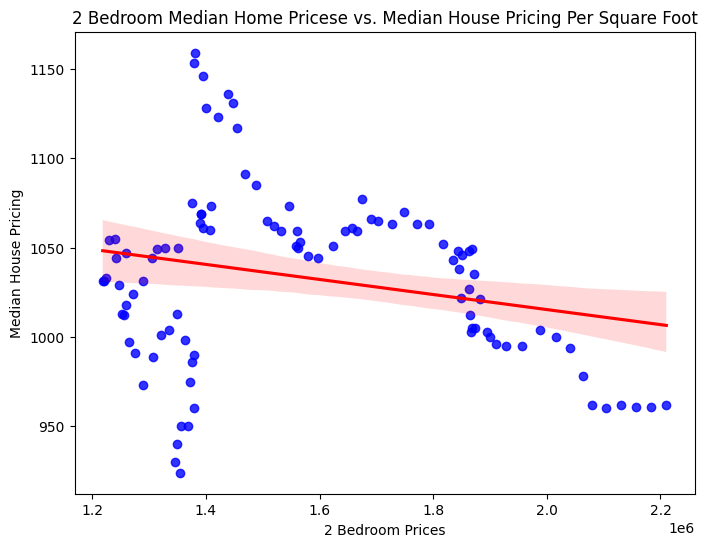

In [50]:
# Ensure both DataFrames are aligned
min_rows = min(len(bed5), len(df))
bed5_trimmed = bed5.iloc[:min_rows]
df_trimmed = df.iloc[:min_rows]

# Calculate Pearson correlation coefficient and p-value
r_value, p_value = stats.pearsonr(bed5_trimmed["Price"], df_trimmed["median_house_pricing"])

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=bed5_trimmed["Price"], y=df_trimmed["median_house_pricing"],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Labels and title
plt.xlabel("2 Bedroom Prices")
plt.ylabel("Median House Pricing")
plt.title("2 Bedroom Median Home Pricese vs. Median House Pricing Per Square Foot")

# Show plot
plt.show()

In [51]:
# Print full precision p-value
print(f"Pearson Correlation (r): {r_value:.4f}")
print(f"P-value: {p_value:.30f}")  # Shows more decimal places

Pearson Correlation (r): -0.2411
P-value: 0.014649175929395847131631036575


# Ethics & Privacy

When analyzing how various features (square footage, number of bedrooms, neighborhood, year built) influence home prices in a city, it’s crucial to address ethical concerns related to data privacy, bias, and equitable analysis. Data privacy must be protected by ensuring that personal identifiable information, such as exact addresses, is removed, and that the dataset is used in compliance with what was agreed upon prior. Bias can arise if certain neighborhoods or house types are overrepresented, leading to skewed results. To detect these issues, exploratory data analysis (EDA) can help identify missing or unbalanced data distributions. Using interpretable models ensures that pricing determinants remain transparent and accountable.

Ensuring the accuracy and reliability of the analysis is essential when studying the relationship between housing features and sale prices. Model selection plays a crucial role, as different regression techniques, such as linear regression or tree-based models, may yield varying results. It is important to evaluate model performance using appropriate metrics like RMSE (Root Mean Square Error) and R² to assess predictive accuracy. Furthermore, feature selection techniques, including multicollinearity checks and principal component analysis (PCA), can help refine the model by eliminating redundant or insignificant variables. Data preprocessing, such as handling missing values, normalizing continuous variables, and encoding categorical variables, ensures consistency and improves predictive performance. Lastly, cross-validation should be employed to prevent overfitting and ensure the model generalizes well to unseen data, reinforcing the credibility of the analysis.


# Team Expectations


* *1) Respond promptly within the instagram group chat the same day*
* *2) Communicate issues or problems ahead of time*
* *3) Setting aside time to meet that is scheduled*
* *4) Making sure everyone contributes as equally as possible*
* *5) Be open to everyone's ideas*
* *6) If and when conflicts arise, clearly confront the issue in a respectful manner to ultimately come up with a solution*


# Project Timeline Proposal




| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/09  |  1:30 PM | Read & Think about COGS 108 expectations (Landon, Jocelyn, Kevin); brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research |
| 2/09|  1:30 PM |  Do background research on topic (Everyone)| Discuss ideal dataset(s) and ethics; draft project proposal |
| 2/09  | 8:00 PM  | Edit, finalize, and submit proposal; Search for datasets (Everyone) | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/22  | 12:00 PM  | Work on data checkpoint #1 (Landon, Kevin, Jocelyn, Leyna)| Update project propsal with TA suggestions (Landon, Jocelyn)  |
| 3/1  | 1:30 PM  | Import & Wrangle Data (Alexa); EDA(Leyna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/8  | 1:30 PM  | Finalize wrangling/EDA; Begin Analysis (Leyna; Alexa) | Discuss/edit Analysis; Complete project check-in |
| 3/15  | 1:30 PM  | Complete analysis; Draft results/conclusion/discussion (Landon, Jocelyn, Kevin)| Discuss/edit full project |
| 3/19  | 1:30 PM  | NA | Turn in Final Project & Group Project Surveys |

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff.


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.